In [1]:
import pandas as pd
from os import path

In [2]:
DATA_DIR = "../../data"

In [3]:
seeds = [2, 13, 19, 27, 38, 42, 56, 63, 6, 78]

In [4]:
split_results = {}
for seed in seeds:
    results = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/10-fold-cross-val", 
        f"training_split_{str(seed)}", 
        "all.csv"
    ), sep="\t", header=None)
    results.columns = ["model_name", "data", "preprocessing", "F1", "MCC", "Acc", "Precision", "Recall", "AUC", "filename"]
    split_results[seed] = results.drop("filename", axis=1)

In [5]:
split_results[2].groupby("model_name")[["F1", "MCC", "Acc", "Precision", "Recall", "AUC"]].mean()

,F1,MCC,Acc,Precision,Recall,AUC
model_name,,,,,,
SVM,0.396096,0.177699,0.613828,0.317198,0.577947,0.601012
gradient_boosting,0.325599,0.166254,0.695169,0.365225,0.372322,0.579641
kNN,0.331294,0.092802,0.605886,0.275929,0.453582,0.551364
logistic_regression,0.423156,0.212270,0.634634,0.330890,0.603863,0.623667
multilayer_perceptron,0.368329,0.193901,0.674590,0.363476,0.462597,0.598718
random_forest,0.374376,0.166247,0.640512,0.325940,0.499190,0.589972


In [6]:
df_list = [split_results[seed] for seed in seeds]
# Concatenate results for all data splits
df_concat = pd.concat(df_list)
df_concat.index = pd.MultiIndex.from_arrays(
    df_concat[['model_name', 'data', 'preprocessing']].values.T, 
    names=['model_name', 'data', 'preprocessing']
)

In [7]:
df_concat

,,,model_name,data,preprocessing,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,,,,
kNN,sapiens,no_prepro,kNN,sapiens,no_prepro,0.326241,0.132130,0.698413,0.319444,0.333333,0.567073
logistic_regression,sapiens,no_prepro,logistic_regression,sapiens,no_prepro,0.408696,0.180163,0.568254,0.291925,0.681159,0.608872
random_forest,sapiens,no_prepro,random_forest,sapiens,no_prepro,0.395480,0.183419,0.660317,0.324074,0.507246,0.605249
multilayer_perceptron,sapiens,no_prepro,multilayer_perceptron,sapiens,no_prepro,0.369863,0.180983,0.707937,0.350649,0.391304,0.594026
SVM,sapiens,no_prepro,SVM,sapiens,no_prepro,0.398305,0.160235,0.549206,0.281437,0.681159,0.596677
...,...,...,...,...,...,...,...,...,...,...,...
logistic_regression,sapiens,undersampling,logistic_regression,sapiens,undersampling,0.407960,0.230759,0.646884,0.299270,0.640625,0.644488
random_forest,sapiens,undersampling,random_forest,sapiens,undersampling,0.377551,0.184926,0.637982,0.280303,0.578125,0.615070
multilayer_perceptron,sapiens,undersampling,multilayer_perceptron,sapiens,undersampling,0.426036,0.262330,0.712166,0.342857,0.562500,0.654876


In [8]:
grouped = df_concat.groupby(level=[0,1,2])
df_means = grouped.mean()

In [9]:
# Means across the different data splits
df_means

F1       MCC       Acc  Precision  \
model_name    data   preprocessing                                            
SVM           bert   no_prepro      0.507240  0.364032  0.730250   0.402953   
                     oversampling   0.506687  0.367155  0.708219   0.387133   
                     scaling        0.505689  0.364406  0.729699   0.400351   
                     smote_os       0.501018  0.354187  0.709613   0.390839   
                     undersampling  0.488984  0.342339  0.680031   0.361206   
...                                      ...       ...       ...        ...   
random_forest seqvec no_prepro      0.451953  0.290178  0.681680   0.355046   
                     oversampling   0.447549  0.283385  0.667503   0.341227   
                     scaling        0.414400  0.265833  0.738895   0.411235   
                     smote_os       0.447118  0.315350  0.776828   0.445276   
                     undersampling  0.463626  0.303955  0.687084   0.352312   

                                      Recall       AUC  
model_name    data   preprocessing                      
SVM           bert   no_prepro      0.690977  0.714284  
                     oversampling   0.746117  0.722401  
                     scaling        0.694907  0.716397  
                     smote_os       0.713847  0.709784  
                     undersampling  0.763185  0.710218  
...                                      ...       ...  
random_forest seqvec no_prepro      0.656784  0.671579  
                     oversampling   0.677699  0.671945  
                     scaling        0.463628  0.634716  
                     smote_os       0.468485  0.661370  
                     undersampling  0.682999  0.685151  

[210 rows x 6 columns]

# Model Statistics

In [10]:
df_means.groupby("model_name")[["F1", "MCC"]].mean()

,F1,MCC
model_name,,
SVM,0.418596,0.240427
gradient_boosting,0.354892,0.229858
kNN,0.351456,0.153781
logistic_regression,0.446291,0.277248
multilayer_perceptron,0.393195,0.240586
random_forest,0.415037,0.258274


In [11]:
# Best combination for each model type
idx = df_means.groupby(['model_name'])['F1'].transform(max) == df_means['F1']
df_means[idx]

,,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,
SVM,seqvec,scaling,0.509131,0.369820,0.728634,0.407589,0.700679,0.718130
gradient_boosting,bert,oversampling,0.475494,0.319293,0.702276,0.371692,0.672134,0.690392
kNN,bert,smote_os,0.408461,0.218477,0.558076,0.278995,0.767088,0.636332
logistic_regression,pybiomed,oversampling,0.536689,0.406583,0.760790,0.437494,0.697789,0.736774
multilayer_perceptron,bert,oversampling,0.531950,0.401169,0.762377,0.438532,0.681812,0.730759
random_forest,bert,undersampling,0.474726,0.319482,0.680608,0.353643,0.724145,0.696209


In [12]:
df_means[idx].to_csv(path.join(DATA_DIR, "evaluations/best_by_model.csv"), sep="\t")

# Data Statistics

In [13]:
df_means.groupby("data")[["F1", "MCC"]].mean()

,F1,MCC
data,,
bert,0.456629,0.313078
integer_encoded,0.324629,0.143140
onehot,0.405819,0.249978
protparam,0.323212,0.109874
pybiomed,0.430884,0.291806
sapiens,0.386767,0.221766
seqvec,0.448105,0.303894


In [14]:
# Best combination for each data representation
idx = df_means.groupby(['data'])['F1'].transform(max) == df_means['F1']
df_means[idx]

F1       MCC  \
model_name            data            preprocessing                       
SVM                   sapiens         no_prepro      0.440897  0.276424   
logistic_regression   integer_encoded oversampling   0.386339  0.193980   
                      onehot          scaling        0.473227  0.321671   
                      pybiomed        oversampling   0.536689  0.406583   
                      seqvec          scaling        0.532628  0.401101   
multilayer_perceptron bert            oversampling   0.531950  0.401169   
random_forest         protparam       no_prepro      0.454840  0.320597   

                                                          Acc  Precision  \
model_name            data            preprocessing                        
SVM                   sapiens         no_prepro      0.632433   0.316385   
logistic_regression   integer_encoded oversampling   0.671059   0.307248   
                      onehot          scaling        0.711729   0.378534   
                      pybiomed        oversampling   0.760790   0.437494   
                      seqvec          scaling        0.746881   0.429014   
multilayer_perceptron bert            oversampling   0.762377   0.438532   
random_forest         protparam       no_prepro      0.770327   0.447753   

                                                       Recall       AUC  
model_name            data            preprocessing                      
SVM                   sapiens         no_prepro      0.739205  0.671882  
logistic_regression   integer_encoded oversampling   0.523023  0.615672  
                      onehot          scaling        0.653494  0.689867  
                      pybiomed        oversampling   0.697789  0.736774  
                      seqvec          scaling        0.716550  0.734494  
multilayer_perceptron bert            oversampling   0.681812  0.730759  
random_forest         protparam       no_prepro      0.487191  0.664357

In [15]:
df_means[idx].to_csv(path.join(DATA_DIR, "evaluations/best_by_data.csv"))

# Preprocessing Statistics

In [16]:
df_means.groupby("preprocessing")[["F1", "MCC"]].mean()

,F1,MCC
preprocessing,,
no_prepro,0.374623,0.224969
oversampling,0.417431,0.242555
scaling,0.376273,0.228360
smote_os,0.392647,0.233448
undersampling,0.421915,0.237479


In [17]:
# Best combination for each preprocessing
idx = df_means.groupby(['preprocessing'])['F1'].transform(max) == df_means['F1']
df_means[idx]

F1       MCC       Acc  \
model_name            data     preprocessing                                 
logistic_regression   pybiomed no_prepro      0.534737  0.403607  0.756843   
                               oversampling   0.536689  0.406583  0.760790   
                      seqvec   scaling        0.532628  0.401101  0.746881   
                               smote_os       0.524962  0.392618  0.771227   
multilayer_perceptron bert     undersampling  0.516422  0.382529  0.731311   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
logistic_regression   pybiomed no_prepro       0.432036  0.703476  0.736316  
                               oversampling    0.437494  0.697789  0.736774  
                      seqvec   scaling         0.429014  0.716550  0.734494  
                               smote_os        0.457876  0.629810  0.717434  
multilayer_perceptron bert     undersampling   0.407415  0.721561  0.726955

# Best total results

In [49]:
df_means.nlargest(10, 'F1')

F1       MCC       Acc  \
model_name            data     preprocessing                                 
logistic_regression   pybiomed oversampling   0.536689  0.406583  0.760790   
                               no_prepro      0.534737  0.403607  0.756843   
                      seqvec   scaling        0.532628  0.401101  0.746881   
multilayer_perceptron bert     oversampling   0.531950  0.401169  0.762377   
logistic_regression   seqvec   no_prepro      0.531949  0.399743  0.743909   
                      pybiomed scaling        0.529316  0.396199  0.756182   
                      seqvec   smote_os       0.524962  0.392618  0.771227   
                               oversampling   0.522227  0.386392  0.733405   
multilayer_perceptron bert     undersampling  0.516422  0.382529  0.731311   
                               smote_os       0.514998  0.379917  0.762960   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
logistic_regression   pybiomed oversampling    0.437494  0.697789  0.736774  
                               no_prepro       0.432036  0.703476  0.736316  
                      seqvec   scaling         0.429014  0.716550  0.734494  
multilayer_perceptron bert     oversampling    0.438532  0.681812  0.730759  
logistic_regression   seqvec   no_prepro       0.422766  0.724898  0.736120  
                      pybiomed scaling         0.431315  0.689428  0.730985  
                      seqvec   smote_os        0.457876  0.629810  0.717434  
                               oversampling    0.409140  0.727253  0.730577  
multilayer_perceptron bert     undersampling   0.407415  0.721561  0.726955  
                               smote_os        0.439925  0.634271  0.714059

In [19]:
df_means.nlargest(10, 'F1').to_csv(path.join(DATA_DIR, "evaluations/best_total.csv"))

In [20]:
df_means.nlargest(10, 'MCC')

F1       MCC       Acc  \
model_name            data     preprocessing                                 
logistic_regression   pybiomed oversampling   0.536689  0.406583  0.760790   
                               no_prepro      0.534737  0.403607  0.756843   
multilayer_perceptron bert     oversampling   0.531950  0.401169  0.762377   
logistic_regression   seqvec   scaling        0.532628  0.401101  0.746881   
                               no_prepro      0.531949  0.399743  0.743909   
                      pybiomed scaling        0.529316  0.396199  0.756182   
                      seqvec   smote_os       0.524962  0.392618  0.771227   
                               oversampling   0.522227  0.386392  0.733405   
multilayer_perceptron bert     undersampling  0.516422  0.382529  0.731311   
                               smote_os       0.514998  0.379917  0.762960   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
logistic_regression   pybiomed oversampling    0.437494  0.697789  0.736774  
                               no_prepro       0.432036  0.703476  0.736316  
multilayer_perceptron bert     oversampling    0.438532  0.681812  0.730759  
logistic_regression   seqvec   scaling         0.429014  0.716550  0.734494  
                               no_prepro       0.422766  0.724898  0.736120  
                      pybiomed scaling         0.431315  0.689428  0.730985  
                      seqvec   smote_os        0.457876  0.629810  0.717434  
                               oversampling    0.409140  0.727253  0.730577  
multilayer_perceptron bert     undersampling   0.407415  0.721561  0.726955  
                               smote_os        0.439925  0.634271  0.714059

# Look at maxima and minima across training splits

### Maximum for models

In [21]:
grouped = df_concat.groupby(level=[0,1,2])
df_max = grouped.max().drop(["model_name", "data", "preprocessing"], axis=1)

In [22]:
idx = df_max.groupby(['model_name'])['F1'].transform(max) == df_max['F1']
df_max[idx]

,,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,
SVM,bert,smote_os,0.661017,0.568411,0.832636,0.565217,0.795918,0.819012
gradient_boosting,pybiomed,oversampling,0.564706,0.411283,0.773050,0.470588,0.730769,0.731865
kNN,bert,smote_os,0.493976,0.352712,0.648536,0.350427,0.884615,0.718367
logistic_regression,bert,smote_os,0.636364,0.534699,0.832636,0.573770,0.779412,0.788722
multilayer_perceptron,pybiomed,oversampling,0.621359,0.518664,0.836820,0.606061,1.000000,0.768636
random_forest,protparam,no_prepro,0.590909,0.504951,0.849372,0.666667,0.653846,0.731096


### Minimum for models

In [23]:
grouped = df_concat.groupby(level=[0,1,2])
df_min = grouped.min().drop(["model_name", "data", "preprocessing"], axis=1)

In [24]:
idx = df_min.groupby(['model_name'])['F1'].transform(max) == df_min['F1']
df_min[idx]

F1       MCC       Acc  \
model_name            data     preprocessing                                 
SVM                   seqvec   scaling        0.450216  0.249013  0.598101   
gradient_boosting     bert     smote_os       0.431373  0.273958  0.686047   
kNN                   seqvec   undersampling  0.355932  0.089738  0.525799   
logistic_regression   seqvec   no_prepro      0.480874  0.313904  0.664557   
                               scaling        0.480874  0.324969  0.674051   
multilayer_perceptron seqvec   oversampling   0.469565  0.327062  0.696203   
random_forest         pybiomed undersampling  0.404908  0.193483  0.565111   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
SVM                   seqvec   scaling         0.322981  0.551020  0.649884  
gradient_boosting     bert     smote_os        0.319588  0.500000  0.651099  
kNN                   seqvec   undersampling   0.247059  0.571429  0.554007  
logistic_regression   seqvec   no_prepro       0.369565  0.666667  0.687456  
                               scaling         0.376068  0.591837  0.693554  
multilayer_perceptron seqvec   oversampling    0.393443  0.478261  0.686164  
random_forest         pybiomed undersampling   0.308219  0.500000  0.616144

### Maximum for data

In [25]:
idx = df_max.groupby(['data'])['F1'].transform(max) == df_max['F1']
df_max[idx]

F1       MCC  \
model_name          data            preprocessing                       
SVM                 bert            smote_os       0.661017  0.568411   
                    onehot          oversampling   0.589147  0.473594   
gradient_boosting   integer_encoded oversampling   0.504202  0.356373   
logistic_regression pybiomed        no_prepro      0.632768  0.522670   
                    seqvec          oversampling   0.615385  0.506697   
random_forest       protparam       no_prepro      0.590909  0.504951   
                    sapiens         no_prepro      0.513274  0.413483   

                                                        Acc  Precision  \
model_name          data            preprocessing                        
SVM                 bert            smote_os       0.832636   0.565217   
                    onehot          oversampling   0.777311   0.475000   
gradient_boosting   integer_encoded oversampling   0.769504   0.428571   
logistic_regression pybiomed        no_prepro      0.815900   0.536232   
                    seqvec          oversampling   0.811715   0.529412   
random_forest       protparam       no_prepro      0.849372   0.666667   
                    sapiens         no_prepro      0.803571   0.487179   

                                                     Recall       AUC  
model_name          data            preprocessing                      
SVM                 bert            smote_os       0.795918  0.819012  
                    onehot          oversampling   0.871429  0.776644  
gradient_boosting   integer_encoded oversampling   0.619565  0.700859  
logistic_regression pybiomed        no_prepro      0.823529  0.793340  
                    seqvec          oversampling   0.804348  0.784249  
random_forest       protparam       no_prepro      0.653846  0.731096  
                    sapiens         no_prepro      0.835165  0.744800

### Minimum for data

In [26]:
idx = df_min.groupby(['data'])['F1'].transform(max) == df_min['F1']
df_min[idx]

F1       MCC  \
model_name            data            preprocessing                       
SVM                   onehot          undersampling  0.398104  0.163803   
                      sapiens         no_prepro      0.392453  0.160235   
logistic_regression   pybiomed        oversampling   0.466258  0.291300   
                      seqvec          no_prepro      0.480874  0.313904   
                                      scaling        0.480874  0.324969   
multilayer_perceptron bert            oversampling   0.467066  0.314971   
random_forest         integer_encoded undersampling  0.341232  0.073060   
                      protparam       undersampling  0.402010  0.177123   

                                                          Acc  Precision  \
model_name            data            preprocessing                        
SVM                   onehot          undersampling  0.536946   0.283582   
                      sapiens         no_prepro      0.522255   0.258706   
logistic_regression   pybiomed        oversampling   0.708861   0.389610   
                      seqvec          no_prepro      0.664557   0.369565   
                                      scaling        0.674051   0.376068   
multilayer_perceptron bert            oversampling   0.690418   0.386139   
random_forest         integer_encoded undersampling  0.533170   0.253086   
                      protparam       undersampling  0.615120   0.300885   

                                                       Recall       AUC  
model_name            data            preprocessing                      
SVM                   onehot          undersampling  0.600000  0.597959  
                      sapiens         no_prepro      0.613636  0.596677  
logistic_regression   pybiomed        oversampling   0.575758  0.664808  
                      seqvec          no_prepro      0.666667  0.687456  
                                      scaling        0.591837  0.693554  
multilayer_perceptron bert            oversampling   0.574468  0.681901  
random_forest         integer_encoded undersampling  0.514286  0.543728  
                      protparam       undersampling  0.571429  0.604820

# Evaluation on TAP

In [54]:
split_results = {}
for seed in seeds:
    results = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/10-fold-cross-val", 
        f"training_split_{str(seed)}", 
        "tap_filt.csv"
    ), sep="\t", header=None)
    results.columns = ["model_name", "data", "preprocessing", "F1", "MCC", "Acc", "Precision", "Recall", "AUC", "filename"]
    split_results[seed] = results.drop("filename", axis=1)

In [55]:
df_list = [split_results[seed] for seed in seeds]
# Concatenate results for all data splits
df_concat = pd.concat(df_list)
df_concat["preprocessing"] = df_concat["preprocessing"].apply(lambda s: s[1:])
df_concat.index = pd.MultiIndex.from_arrays(
    df_concat[['model_name', 'data', 'preprocessing']].values.T, 
    names=['model_name', 'data', 'preprocessing']
)

In [56]:
df_concat

,,,model_name,data,preprocessing,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,,,,
kNN,integer_encoded,no_prepro,kNN,integer_encoded,no_prepro,0.379630,0.064033,0.267760,0.976190,0.235632,0.562261
logistic_regression,integer_encoded,no_prepro,logistic_regression,integer_encoded,no_prepro,0.683824,-0.009137,0.530055,0.948980,0.534483,0.489464
random_forest,integer_encoded,no_prepro,random_forest,integer_encoded,no_prepro,0.683824,-0.009137,0.530055,0.948980,0.534483,0.489464
multilayer_perceptron,integer_encoded,no_prepro,multilayer_perceptron,integer_encoded,no_prepro,0.445415,-0.071378,0.306011,0.927273,0.293103,0.424330
SVM,integer_encoded,no_prepro,SVM,integer_encoded,no_prepro,0.458874,-0.065302,0.316940,0.929825,0.304598,0.430077
...,...,...,...,...,...,...,...,...,...,...,...
kNN,onehot,undersampling,kNN,onehot,undersampling,0.832258,-0.018016,0.715847,0.948529,0.741379,0.481801
logistic_regression,onehot,undersampling,logistic_regression,onehot,undersampling,0.754325,-0.018003,0.612022,0.947826,0.626437,0.479885
random_forest,onehot,undersampling,random_forest,onehot,undersampling,0.750000,-0.020514,0.606557,0.947368,0.620690,0.477011


In [57]:
tap_grouped = df_concat.groupby(level=[0,1,2])
tap_means = tap_grouped.mean()

In [58]:
tap_means

F1       MCC       Acc  Precision  \
model_name    data   preprocessing                                            
SVM           bert   no_prepro      0.666578  0.018539  0.513281   0.958139   
                     oversampling   0.715655  0.038942  0.569084   0.961227   
                     scaling        0.677250  0.023553  0.525041   0.959210   
                     smote_os       0.692655  0.022547  0.542053   0.958533   
                     undersampling  0.722149  0.013100  0.575491   0.956540   
...                                      ...       ...       ...        ...   
random_forest seqvec no_prepro      0.000000  0.000000  0.045539   0.000000   
                     oversampling   0.000000  0.000000  0.045539   0.000000   
                     scaling        0.000000  0.000000  0.045539   0.000000   
                     smote_os       0.184699 -0.020507  0.186631   0.338183   
                     undersampling  0.354742 -0.012475  0.307602   0.655377   

                                      Recall       AUC  
model_name    data   preprocessing                      
SVM           bert   no_prepro      0.512516  0.522340  
                     oversampling   0.571484  0.546268  
                     scaling        0.524807  0.528486  
                     smote_os       0.543730  0.526836  
                     undersampling  0.581626  0.515375  
...                                      ...       ...  
random_forest seqvec no_prepro      0.000000  0.500000  
                     oversampling   0.000000  0.500000  
                     scaling        0.000000  0.500000  
                     smote_os       0.156441  0.489039  
                     undersampling  0.289745  0.486393  

[205 rows x 6 columns]

In [59]:
tap_means.groupby("model_name")[["F1", "Acc"]].mean()

,F1,Acc
model_name,,
SVM,0.591630,0.475539
gradient_boosting,0.451805,0.346120
kNN,0.519008,0.398862
logistic_regression,0.591500,0.468941
multilayer_perceptron,0.473632,0.366623
random_forest,0.539993,0.420598


In [60]:
idx = tap_means.groupby(['model_name'])['Acc'].transform(max) == tap_means['Acc']
tap_means[idx]

,,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,
SVM,onehot,undersampling,0.799957,0.013396,0.677452,0.956466,0.693721,0.514112
gradient_boosting,onehot,undersampling,0.765019,-0.034688,0.624251,0.953399,0.639250,0.458514
kNN,bert,smote_os,0.803273,-0.088714,0.673165,0.942565,0.700226,0.403037
logistic_regression,sapiens,oversampling,0.774191,0.023209,0.639344,0.954678,0.651724,0.525862
multilayer_perceptron,protparam,smote_os,0.707746,0.012817,0.621788,0.962350,0.632306,0.514398
random_forest,sapiens,undersampling,0.804413,0.015066,0.679235,0.952729,0.697126,0.515230


In [61]:
idx = df_means.groupby(['model_name'])['Acc'].transform(max) == df_means['Acc']
df_means[idx]

F1       MCC       Acc  \
model_name            data     preprocessing                                 
SVM                   onehot   smote_os       0.370342  0.261385  0.779592   
gradient_boosting     bert     scaling        0.335300  0.266914  0.805544   
kNN                   bert     no_prepro      0.321535  0.164065  0.741989   
                               scaling        0.321535  0.164065  0.741989   
logistic_regression   seqvec   smote_os       0.524962  0.392618  0.771227   
multilayer_perceptron bert     no_prepro      0.466924  0.362935  0.807379   
                               scaling        0.466924  0.362935  0.807379   
random_forest         pybiomed smote_os       0.375341  0.275552  0.798391   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
SVM                   onehot   smote_os        0.460001  0.344501  0.616744  
gradient_boosting     bert     scaling         0.535827  0.253728  0.598209  
kNN                   bert     no_prepro       0.336278  0.312139  0.580162  
                               scaling         0.336278  0.312139  0.580162  
logistic_regression   seqvec   smote_os        0.457876  0.629810  0.717434  
multilayer_perceptron bert     no_prepro       0.535892  0.434399  0.667613  
                               scaling         0.535892  0.434399  0.667613  
random_forest         pybiomed smote_os        0.493666  0.306923  0.613783

In [62]:
tap_means.groupby("data")[["F1", "Acc"]].mean()

,F1,Acc
data,,
bert,0.630592,0.486256
integer_encoded,0.575602,0.435522
onehot,0.621618,0.478948
protparam,0.588250,0.455910
pybiomed,0.570143,0.428691
sapiens,0.659864,0.518514
seqvec,0.084104,0.114355


In [63]:
df_means.nlargest(10, 'F1')

F1       MCC       Acc  \
model_name            data     preprocessing                                 
logistic_regression   pybiomed oversampling   0.536689  0.406583  0.760790   
                               no_prepro      0.534737  0.403607  0.756843   
                      seqvec   scaling        0.532628  0.401101  0.746881   
multilayer_perceptron bert     oversampling   0.531950  0.401169  0.762377   
logistic_regression   seqvec   no_prepro      0.531949  0.399743  0.743909   
                      pybiomed scaling        0.529316  0.396199  0.756182   
                      seqvec   smote_os       0.524962  0.392618  0.771227   
                               oversampling   0.522227  0.386392  0.733405   
multilayer_perceptron bert     undersampling  0.516422  0.382529  0.731311   
                               smote_os       0.514998  0.379917  0.762960   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
logistic_regression   pybiomed oversampling    0.437494  0.697789  0.736774  
                               no_prepro       0.432036  0.703476  0.736316  
                      seqvec   scaling         0.429014  0.716550  0.734494  
multilayer_perceptron bert     oversampling    0.438532  0.681812  0.730759  
logistic_regression   seqvec   no_prepro       0.422766  0.724898  0.736120  
                      pybiomed scaling         0.431315  0.689428  0.730985  
                      seqvec   smote_os        0.457876  0.629810  0.717434  
                               oversampling    0.409140  0.727253  0.730577  
multilayer_perceptron bert     undersampling   0.407415  0.721561  0.726955  
                               smote_os        0.439925  0.634271  0.714059

In [64]:
tap_means.nlargest(10, 'Acc')

F1       MCC       Acc  \
model_name          data      preprocessing                                 
random_forest       sapiens   undersampling  0.804413  0.015066  0.679235   
SVM                 onehot    undersampling  0.799957  0.013396  0.677452   
                    sapiens   undersampling  0.801625  0.046503  0.677049   
kNN                 bert      smote_os       0.803273 -0.088714  0.673165   
SVM                 sapiens   oversampling   0.795091  0.032373  0.667213   
                    protparam no_prepro      0.778282 -0.002616  0.650683   
random_forest       onehot    undersampling  0.780826 -0.020526  0.646246   
logistic_regression sapiens   oversampling   0.774191  0.023209  0.639344   
                    onehot    undersampling  0.774112  0.012472  0.638714   
kNN                 onehot    undersampling  0.771780 -0.035459  0.634928   

                                             Precision    Recall       AUC  
model_name          data      preprocessing                                 
random_forest       sapiens   undersampling   0.952729  0.697126  0.515230  
SVM                 onehot    undersampling   0.956466  0.693721  0.514112  
                    sapiens   undersampling   0.958153  0.690805  0.550958  
kNN                 bert      smote_os        0.942565  0.700226  0.403037  
SVM                 sapiens   oversampling    0.955824  0.681609  0.535249  
                    protparam no_prepro       0.954157  0.666058  0.497064  
random_forest       onehot    undersampling   0.951450  0.663245  0.476359  
logistic_regression sapiens   oversampling    0.954678  0.651724  0.525862  
                    onehot    undersampling   0.956560  0.651193  0.514485  
kNN                 onehot    undersampling   0.948897  0.652497  0.459582

In [65]:
# How did the best models from TAP do on test?

In [66]:
idx = tap_means.nlargest(10, 'Acc')["Acc"].index
tap_means.loc[idx]

F1       MCC       Acc  \
model_name          data      preprocessing                                 
random_forest       sapiens   undersampling  0.804413  0.015066  0.679235   
SVM                 onehot    undersampling  0.799957  0.013396  0.677452   
                    sapiens   undersampling  0.801625  0.046503  0.677049   
kNN                 bert      smote_os       0.803273 -0.088714  0.673165   
SVM                 sapiens   oversampling   0.795091  0.032373  0.667213   
                    protparam no_prepro      0.778282 -0.002616  0.650683   
random_forest       onehot    undersampling  0.780826 -0.020526  0.646246   
logistic_regression sapiens   oversampling   0.774191  0.023209  0.639344   
                    onehot    undersampling  0.774112  0.012472  0.638714   
kNN                 onehot    undersampling  0.771780 -0.035459  0.634928   

                                             Precision    Recall       AUC  
model_name          data      preprocessing                                 
random_forest       sapiens   undersampling   0.952729  0.697126  0.515230  
SVM                 onehot    undersampling   0.956466  0.693721  0.514112  
                    sapiens   undersampling   0.958153  0.690805  0.550958  
kNN                 bert      smote_os        0.942565  0.700226  0.403037  
SVM                 sapiens   oversampling    0.955824  0.681609  0.535249  
                    protparam no_prepro       0.954157  0.666058  0.497064  
random_forest       onehot    undersampling   0.951450  0.663245  0.476359  
logistic_regression sapiens   oversampling    0.954678  0.651724  0.525862  
                    onehot    undersampling   0.956560  0.651193  0.514485  
kNN                 onehot    undersampling   0.948897  0.652497  0.459582

In [67]:
df_means.loc[idx]

F1       MCC       Acc  \
model_name          data      preprocessing                                 
random_forest       sapiens   undersampling  0.417499  0.242503  0.592095   
SVM                 onehot    undersampling  0.439065  0.270890  0.614257   
                    sapiens   undersampling  0.421204  0.247244  0.588778   
kNN                 bert      smote_os       0.408461  0.218477  0.558076   
SVM                 sapiens   oversampling   0.425270  0.256202  0.581054   
                    protparam no_prepro      0.290875 -0.023772  0.402909   
random_forest       onehot    undersampling  0.434021  0.257888  0.621630   
logistic_regression sapiens   oversampling   0.429601  0.257794  0.619353   
                    onehot    undersampling  0.454904  0.289730  0.645970   
kNN                 onehot    undersampling  0.400957  0.204203  0.574131   

                                             Precision    Recall       AUC  
model_name          data      preprocessing                                 
random_forest       sapiens   undersampling   0.290791  0.752356  0.651525  
SVM                 onehot    undersampling   0.310213  0.759729  0.668113  
                    sapiens   undersampling   0.291190  0.767607  0.655914  
kNN                 bert      smote_os        0.278995  0.767088  0.636332  
SVM                 sapiens   oversampling    0.292000  0.793791  0.661650  
                    protparam no_prepro       0.190262  0.627450  0.484687  
random_forest       onehot    undersampling   0.310278  0.726287  0.659607  
logistic_regression sapiens   oversampling    0.305493  0.732831  0.661482  
                    onehot    undersampling   0.329241  0.738191  0.679574  
kNN                 onehot    undersampling   0.279910  0.715698  0.627274

# Error bars

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
f1_df = pd.concat(df_list)[["model_name", "data", "preprocessing", "F1"]]

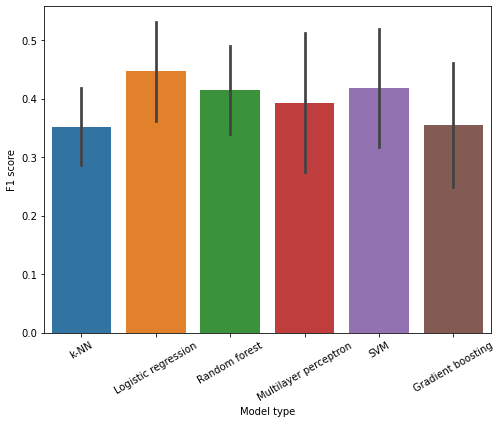

In [29]:
plt.figure(figsize=(8,6))
order = ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]
ax = sns.barplot(x="model_name", y="F1", data=f1_df, ci="sd", order=order)
labels = ["k-NN", "Logistic regression", "Random forest", "Multilayer perceptron", "SVM", "Gradient boosting"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Model type")
ax.set_ylabel("F1 score")
plt.savefig(path.join(DATA_DIR, "images/f1_of_cross_val_with_sd.png"), bbox_inches='tight')
plt.show()

In [60]:
grouped = df_concat.groupby(level=[0,1,2])
grouped

In [85]:
means = grouped.mean()[["F1"]]
means.rename({"F1": "mean"}, axis=1, inplace=True)
se = grouped.std()[["F1"]]
se.rename({"F1": "sd"}, axis=1, inplace=True)

In [86]:
pd.concat([means, se], axis=1)

mean        sd
model_name    data   preprocessing                    
SVM           bert   no_prepro      0.507240  0.054367
                     oversampling   0.506687  0.062805
                     scaling        0.505689  0.065583
                     smote_os       0.501018  0.072398
                     undersampling  0.488984  0.047544
...                                      ...       ...
random_forest seqvec no_prepro      0.451953  0.065148
                     oversampling   0.447549  0.053766
                     scaling        0.414400  0.067502
                     smote_os       0.447118  0.071582
                     undersampling  0.463626  0.032578

[210 rows x 2 columns]

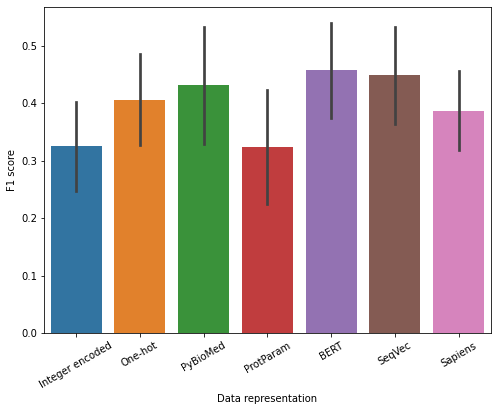

In [30]:
plt.figure(figsize=(8,6))
order = ["integer_encoded", "onehot", "pybiomed", "protparam", "bert", "seqvec", "sapiens"]
ax = sns.barplot(x="data", y="F1", data=f1_df, ci="sd", order=order)
labels = ["Integer encoded", "One-hot", "PyBioMed", "ProtParam", "BERT", "SeqVec", "Sapiens"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Data representation")
ax.set_ylabel("F1 score")
plt.savefig(path.join(DATA_DIR, "images/f1_of_cross_val_with_sd_by_data.png"), bbox_inches='tight')
plt.show()

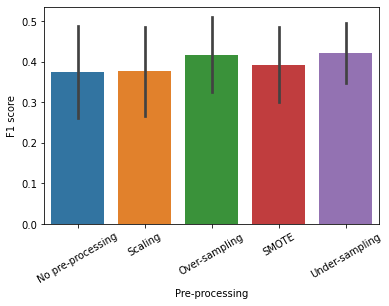

In [53]:
plt.figure(figsize=(6,4))
order = ["no_prepro", "scaling", "oversampling", "smote_os", "undersampling"]
ax = sns.barplot(x="preprocessing", y="F1", data=f1_df, ci="sd", order=order)
labels = ["No pre-processing", "Scaling", "Over-sampling", "SMOTE", "Under-sampling"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Pre-processing")
ax.set_ylabel("F1 score")
plt.savefig(path.join(DATA_DIR, "images/f1_of_cross_val_with_sd_by_prepro.png"), bbox_inches='tight')
plt.show()

# TAP

In [68]:
tap_acc_df = pd.concat(df_list)[["model_name", "data", "preprocessing", "F1", "Acc"]]

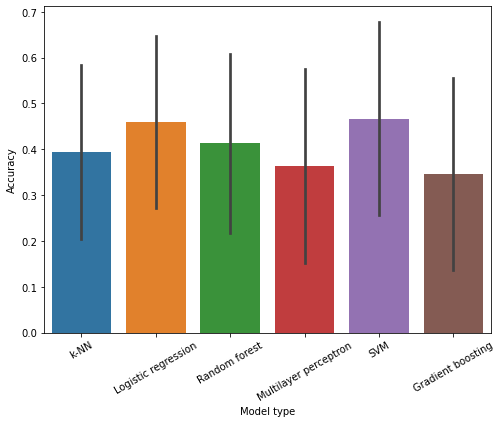

In [69]:
plt.figure(figsize=(8,6))
order = ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]
ax = sns.barplot(x="model_name", y="Acc", data=tap_acc_df, ci="sd", order=order)
labels = ["k-NN", "Logistic regression", "Random forest", "Multilayer perceptron", "SVM", "Gradient boosting"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Model type")
ax.set_ylabel("Accuracy")
plt.savefig(path.join(DATA_DIR, "images/acc_on_tap_cross_val_with_sd.png"), bbox_inches='tight')
plt.show()

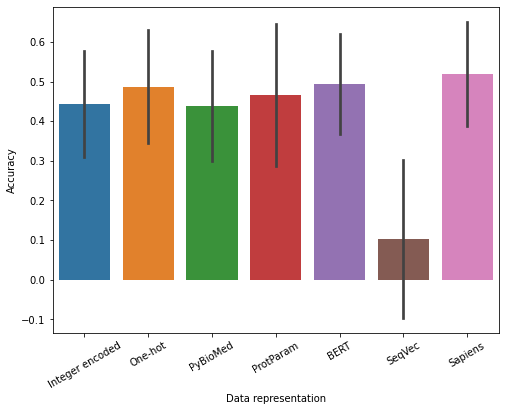

In [70]:
plt.figure(figsize=(8,6))
order =  ["integer_encoded", "onehot", "pybiomed", "protparam", "bert", "seqvec", "sapiens"]
ax = sns.barplot(x="data", y="Acc", data=tap_acc_df, ci="sd", order=order)
labels = ["Integer encoded", "One-hot", "PyBioMed", "ProtParam", "BERT", "SeqVec", "Sapiens"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Data representation")
ax.set_ylabel("Accuracy")
plt.savefig(path.join(DATA_DIR, "images/acc_on_tap_cross_val_with_sd_by_data.png"), bbox_inches='tight')
plt.show()

## Heatmap

In [78]:
f1_df = f1_df.reset_index(drop=True)

In [85]:
reindexed = df_means.reset_index()

In [101]:
grouped = reindexed.groupby(["model_name", "data"], as_index=False).mean()

In [111]:
unstacked = grouped.pivot("model_name", "data", "F1")[["integer_encoded", "onehot", "protparam", "pybiomed", "bert", "seqvec", "sapiens"]]
unstacked = pd.concat([unstacked.iloc[2:3], unstacked.iloc[3:4], unstacked.iloc[5:6], unstacked.iloc[1:2], unstacked.iloc[0:1], unstacked.iloc[4:5]])
unstacked

data,integer_encoded,onehot,protparam,pybiomed,bert,seqvec,sapiens
model_name,,,,,,,
kNN,0.337160,0.378059,0.252334,0.374520,0.369535,0.382840,0.365746
logistic_regression,0.373974,0.450731,0.324683,0.514417,0.506956,0.524317,0.428961
random_forest,0.320067,0.408999,0.440686,0.431637,0.453391,0.444929,0.405550
gradient_boosting,0.266967,0.341493,0.388806,0.378579,0.408523,0.365285,0.334588
SVM,0.325824,0.432966,0.287495,0.480277,0.501923,0.487231,0.414456
multilayer_perceptron,0.323782,0.422665,0.245268,0.405872,0.499443,0.484031,0.371300


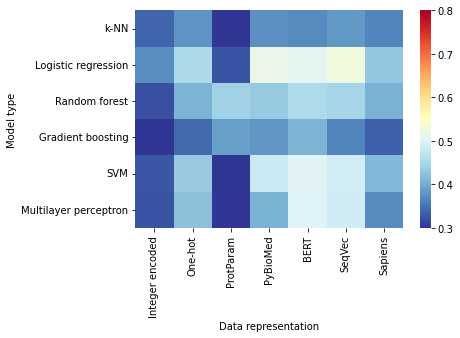

In [150]:
xlabels = ["Integer encoded", "One-hot", "ProtParam", "PyBioMed", "BERT", "SeqVec", "Sapiens"]
ylabels = ["k-NN", "Logistic regression", "Random forest", "Gradient boosting", "SVM", "Multilayer perceptron"]
ax = sns.heatmap(
    unstacked, xticklabels=xlabels, yticklabels=ylabels, cmap="RdYlBu_r", vmin=0.3, vmax=0.8
)
ax.set_ylabel("Model type")
ax.set_xlabel("Data representation")
plt.savefig(path.join(DATA_DIR, "images/heatmap.png"), bbox_inches='tight')

## ProteinBERT

In [122]:
df_bert = pd.DataFrame({
    "random_seed": [2,13,19,27,38,42,56,63,6,78],
    "metric": [0.526, 0.636, 0.486, 0.324, 0.492, 0.657, 0.482, 0.535, 0.487, 0.417], # F1
    "epochs": [26, 39, 45, 46, 23, 43, 42, 35, 34, 17],
    "x": [1,1,1,1,1,1,1,1,1,1]
})

In [124]:
df_acc = pd.DataFrame({
    "random_seed": [2,13,19,27,38,42,56,63,6,78],
    "metric": [0.580, 0.589, 0.598, 0.560, 0.610, 0.535,0.676, 0.560, 0.515, 0.639], # Accuracy
    "epochs": [26, 39, 45, 46, 23, 43, 42, 35, 34, 17],
    "x": [0,0,0,0,0,0,0,0,0,0]
})
df_bert_adj = pd.concat([df_bert, df_acc])

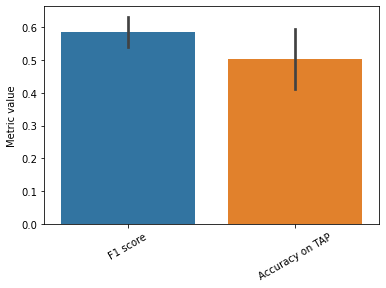

In [130]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="x", y="metric", data=df_bert_adj, ci="sd")
labels = ["F1 score", "Accuracy on TAP"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("")
ax.set_ylabel("Metric value")
plt.savefig(path.join(DATA_DIR, "images/f1_and_acc_protein_bert.png"), bbox_inches='tight')
plt.show()